In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from config import api_key
import gmaps
# Google developer API key
from config1 import gkey
# Access maps with unique API key
gmaps.configure(api_key=gkey)
import datetime
import numpy as np
rdf = pd.read_pickle('./launches.pickle')
rdf.head()

,rocket,family,rock_agency,location,lat,lon,result,failreason,date,lsp_name,lsp_country
0,Falcon 9 v1.1,Falcon,SpaceX,"Space Launch Complex 40, Cape Canaveral, FL",28.561941,-80.577357,1,NA,2014-01-06 22:06:00,SpaceX,USA
1,Antares 120,Antares,Orbital ATK,"Launch Area 0 A, Wallops Island, Virginia",37.833700,-75.488100,1,NA,2014-01-09 18:07:05,Orbital Sciences Corporation,USA
2,Ariane 5 ECA,Ariane,NA,"Ariane Launch Area 3, Kourou",5.239000,-52.768000,1,NA,2014-02-06 21:30:07,Arianespace,FRA
3,Atlas V 401,Atlas,NA,"Space Launch Complex 41, Cape Canaveral, FL",28.583410,-80.583036,1,NA,2014-01-24 02:33:00,United Launch Alliance,USA
4,Soyuz U,Soyuz,NA,"1/5, Baikonur Cosmodrome, Kazakhstan",45.920000,63.342000,1,NA,2014-02-05 16:23:32,Russian Federal Space Agency (ROSCOSMOS),RUS


In [2]:
year = []
rdf['year'] = rdf['date'].dt.year
bins = [1969, 1980, 1990, 2000, 2010, 2020]
# Create the names for the four bins
group_names = ["1970's", "1980's", "1990's", "2000's", "2010's"]
rdf["Decade"] = pd.cut(rdf["year"], bins, labels=group_names)
rdf_f = rdf.loc[rdf['result'] == 0]
rdf_p = rdf.loc[rdf['result'] == 1]

In [3]:
k = pd.DataFrame(rdf_f.groupby(["lsp_country"]).lsp_country.count())
country_fails_name = k["lsp_country"].index.get_level_values(0).tolist()
k.reset_index(drop=True)
country_fails_count = k["lsp_country"].tolist()
fails_country = pd.DataFrame({'country_fails_name' : country_fails_name,
  'country_fails_count' : country_fails_count,
   }, columns=['country_fails_name','country_fails_count'])
fails_country.reset_index(drop=True)
s=[]
for i in range(len(rdf_f['lsp_country'])):
    for j in range(len(fails_country['country_fails_count'])):
        if list(rdf_f['lsp_country'])[i] == list(fails_country['country_fails_name'])[j]:
            s.append(list(fails_country['country_fails_count'])[j])
rdf_f["rating"] = s
rdf_f

C:\Users\safwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,rocket,family,rock_agency,location,lat,lon,result,failreason,date,lsp_name,lsp_country,year,Decade,rating
36,Falcon 9 v1.1,Falcon,SpaceX,"Space Launch Complex 40, Cape Canaveral, FL",28.561941,-80.577357,0,Rapid Unscheduled Disassembly at T+ 2min19sec ...,2015-06-28 14:21:11,SpaceX,USA,2015,2010's,55
76,Space Shuttle Challenger OV-099,Space Shuttle,National Aeronautics and Space Administration,"Launch Complex 39B, Kennedy Space Center, FL",28.627112,-80.621015,0,"During the ascent phase, 73 seconds after lift...",1986-01-28 16:38:00,Lockheed Space Operations Company,USA,1986,1980's,55
82,Proton-M/Briz-M,Proton / UR-500,NA,"200/39 (200L), Baikonur Cosmodrome, Kazakhstan",46.039984,63.032093,0,Proton-M third stage vernier engine failed at ...,2015-05-16 05:47:39,International Launch Services,USA,2015,2010's,55
83,Soyuz 2.1a,Soyuz,NA,"31/6, Baikonur Cosmodrome, Kazakhstan",45.996034,63.564003,0,"After reaching low Earth orbit, but before sep...",2015-04-28 07:09:50,Russian Federal Space Agency (ROSCOSMOS),RUS,2015,2010's,12
105,Soyuz 2-1v/Volga,Soyuz,NA,"43/4 (43R), Plesetsk Cosmodrome, Russia",62.928830,40.457098,0,,2015-12-05 14:09:00,Russian Space Forces,RUS,2015,2010's,12
119,SPARK,Strypi,NA,"LP-41, Barking Sands",22.022778,-159.785000,0,Vehicle lost attitude control around a minute ...,2015-11-04 03:45:00,Sandia National Laboratories,USA,2015,2010's,55
171,Soyuz STB/Fregat,Soyuz,NA,"Soyuz Launch Complex, Kourou/Sinnamary",5.301900,-52.834600,0,Satellites were placed into an incorrect orbit...,2014-08-22 12:27:11,Arianespace,FRA,2014,2010's,3
188,Proton-M/Briz-M,Proton / UR-500,NA,"81/24 (81P), Baikonur Cosmodrome, Kazakhstan",46.071001,62.984999,0,The payload was placed into a lower than plann...,2014-10-21 15:09:32,Khrunichev State Research and Production Space...,RUS,2014,2010's,12
299,Space Shuttle Columbia OV-102,Space Shuttle,National Aeronautics and Space Administration,"Launch Complex 39A, Kennedy Space Center, FL",28.608227,-80.604282,0,The seven members of the crew were killed on F...,2003-01-16 15:39:00,United Space Alliance,USA,2003,2000's,55
329,Falcon 9 Full Thrust (Block 3),Falcon,SpaceX,"Space Launch Complex 40, Cape Canaveral, FL",28.561941,-80.577357,0,Rocket and payload lost during anomaly origina...,2016-09-03 09:00:00,SpaceX,USA,2016,2010's,55


In [64]:
locations = rdf_f[["lat", "lon"]].astype(float)
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rdf_f["rating"], 
                                 dissipating=False, max_intensity=1,
                                 point_radius=5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [65]:
l = pd.DataFrame(rdf_p.groupby(["lsp_country"]).lsp_country.count())
country_passes_name = l["lsp_country"].index.get_level_values(0).tolist()
country_passes_name
l.reset_index(drop=True)
country_passes_count = l["lsp_country"].tolist()
passes_country = pd.DataFrame({'country_passes_name' : country_passes_name,
  'country_passes_count' : country_passes_count,
   }, columns=['country_passes_name','country_passes_count'])
passes_country.reset_index(drop=True)
t=[]
for m in range(len(rdf_p['lsp_country'])):
     for n in range(len(passes_country['country_passes_count'])):
        if list(rdf_p['lsp_country'])[m] == list(passes_country['country_passes_name'])[n]:
             t.append(list(passes_country['country_passes_count'])[n])
rdf_p["rating"] = t
rdf_p

C:\Users\safwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,rocket,family,rock_agency,location,lat,lon,result,failreason,date,lsp_name,lsp_country,year,Decade,rating
0,Falcon 9 v1.1,Falcon,SpaceX,"Space Launch Complex 40, Cape Canaveral, FL",28.561941,-80.577357,1,NA,2014-01-06 22:06:00,SpaceX,USA,2014,2010's,499
1,Antares 120,Antares,Orbital ATK,"Launch Area 0 A, Wallops Island, Virginia",37.833700,-75.488100,1,NA,2014-01-09 18:07:05,Orbital Sciences Corporation,USA,2014,2010's,499
2,Ariane 5 ECA,Ariane,NA,"Ariane Launch Area 3, Kourou",5.239000,-52.768000,1,NA,2014-02-06 21:30:07,Arianespace,FRA,2014,2010's,170
3,Atlas V 401,Atlas,NA,"Space Launch Complex 41, Cape Canaveral, FL",28.583410,-80.583036,1,NA,2014-01-24 02:33:00,United Launch Alliance,USA,2014,2010's,499
4,Soyuz U,Soyuz,NA,"1/5, Baikonur Cosmodrome, Kazakhstan",45.920000,63.342000,1,NA,2014-02-05 16:23:32,Russian Federal Space Agency (ROSCOSMOS),RUS,2014,2010's,312
5,Proton-M/Briz-M,Proton / UR-500,NA,"81/24 (81P), Baikonur Cosmodrome, Kazakhstan",46.071001,62.984999,1,NA,2014-02-14 21:09:03,International Launch Services,USA,2014,2010's,499
6,"Delta IV M+(4,2)",Delta,NA,"Space Launch Complex 37B, Cape Canaveral, FL",28.531700,-80.564950,1,NA,2014-02-21 01:59:00,United Launch Alliance,USA,2014,2010's,499
7,H-IIA 202,H-II,NA,"Yoshinobu Launch Complex, Tanegashima, Japan",30.402222,130.975000,1,NA,2014-02-27 18:37:00,Mitsubishi Heavy Industries,JPN,2014,2010's,42
8,Proton-M/Briz-M,Proton / UR-500,NA,"81/24 (81P), Baikonur Cosmodrome, Kazakhstan",46.071001,62.984999,1,NA,2014-03-15 23:08:00,Khrunichev State Research and Production Space...,RUS,2014,2010's,312
9,Ariane 5 ECA,Ariane,NA,"Ariane Launch Area 3, Kourou",5.239000,-52.768000,1,NA,2014-03-22 22:04:07,Arianespace,FRA,2014,2010's,170


In [69]:
locations1 = rdf_p[["lat", "lon"]].astype(float)
# Plot Heatmap
fig1 = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations1, weights=rdf_p["rating"], 
                                 dissipating=False, max_intensity=1,
                                 point_radius=2)

# Add layer
fig1.add_layer(heat_layer)

# Display figure
fig1

Figure(layout=FigureLayout(height='420px'))

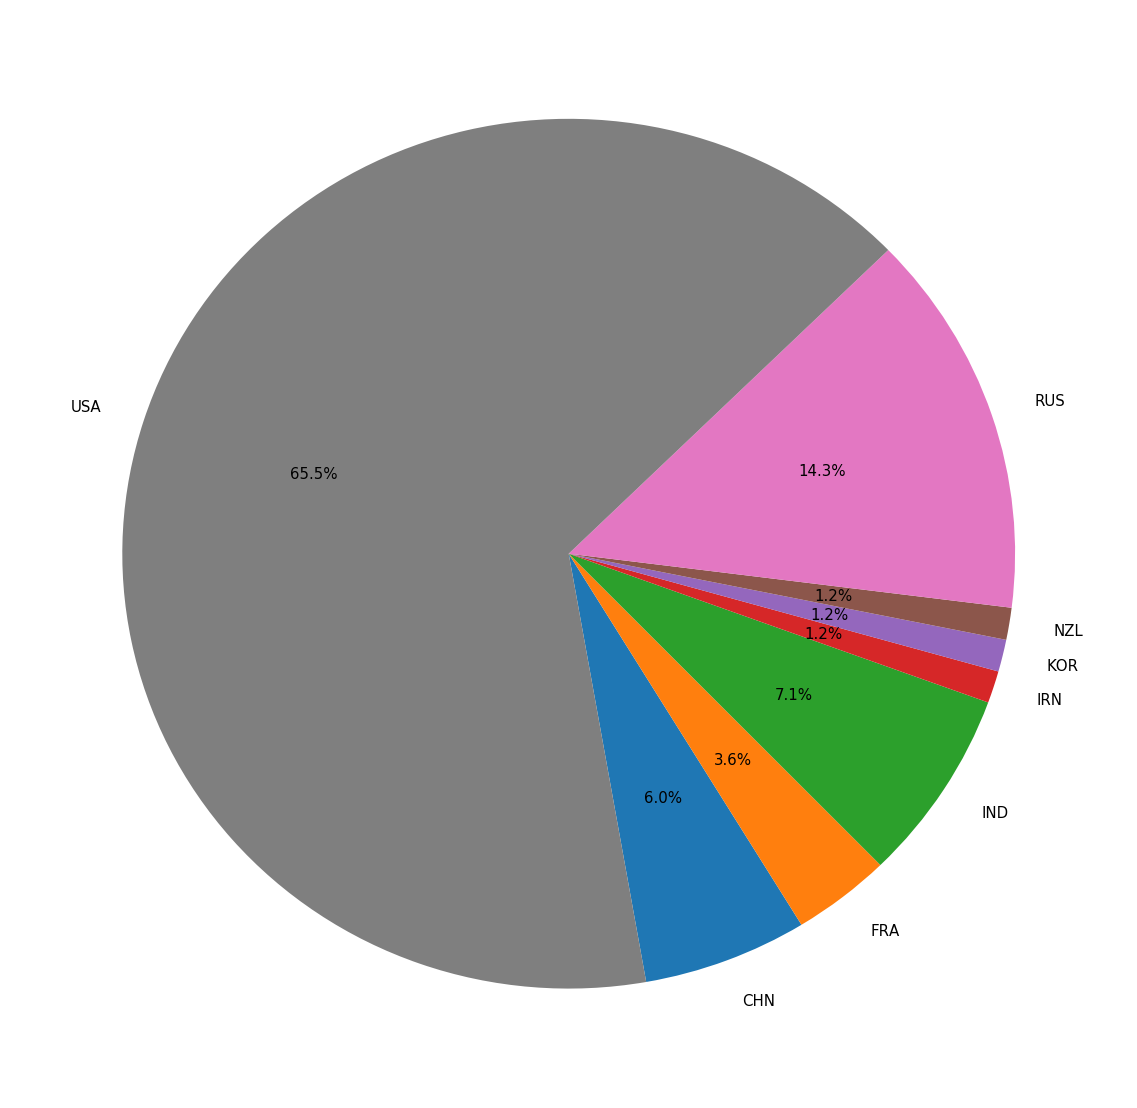

In [19]:
plt.figure(figsize=(20,20))
country_fails = rdf_f['lsp_country'].value_counts()
piefails = rdf_f.groupby(["lsp_country"]).count()["rocket"]
z= rdf_f.groupby(["lsp_country"]).count()["rocket"]
labels = z.index.get_level_values(0).tolist()
labels
plt.pie(rdf_f.groupby(["lsp_country"]).count()["rocket"], labels=labels,
        
        autopct="%1.1f%%", shadow=False, startangle=280)
mpl.rcParams['font.size'] = 2.0
plt.savefig('../Rocket Launch Failures per Country.png')


<IPython.core.display.Javascript object>


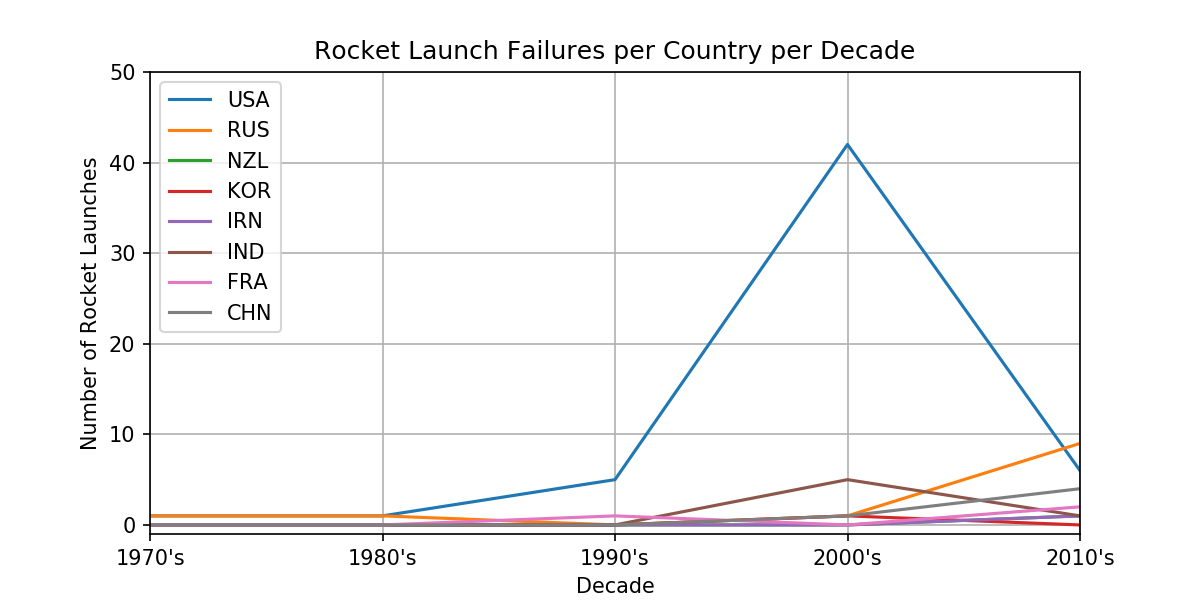

In [138]:
s = pd.DataFrame(rdf_f.groupby(["lsp_country","Decade"]).count())
%matplotlib notebook
plt.figure(figsize=(8,4))
USA_F = [1,1,5,42,6]
RUS_F = [1,1,0,1,9]
NZL_F = [0,0,0,0,1]
KOR_F = [0,0,0,1,0]
IRN_F = [0,0,0,0,1]
IND_F = [0,0,0,5,1]
FRA_F = [0,0,1,0,2]
CHN_F = [0,0,0,1,4]
USA_F, = plt.plot(group_names,USA_F,label = "USA")
RUS_F, = plt.plot(group_names,RUS_F,label = "RUS")
NZL_F, = plt.plot(group_names,NZL_F,label = "NZL")
KOR_F, = plt.plot(group_names,KOR_F,label = "KOR")
IRN_F, = plt.plot(group_names,IRN_F,label = "IRN")
IND_F, = plt.plot(group_names,IND_F,label = "IND")
FRA_F, = plt.plot(group_names,FRA_F,label = "FRA")
CHN_F, = plt.plot(group_names,CHN_F,label = "CHN")
plt.legend()
plt.grid()
plt.title("Rocket Launch Failures per Country per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Rocket Launches")
plt.ylim(-1,50)
plt.xlim(group_names[0],group_names[4])
plt.savefig('../Rocket Launch Failures per Country per Decade.png')

<IPython.core.display.Javascript object>


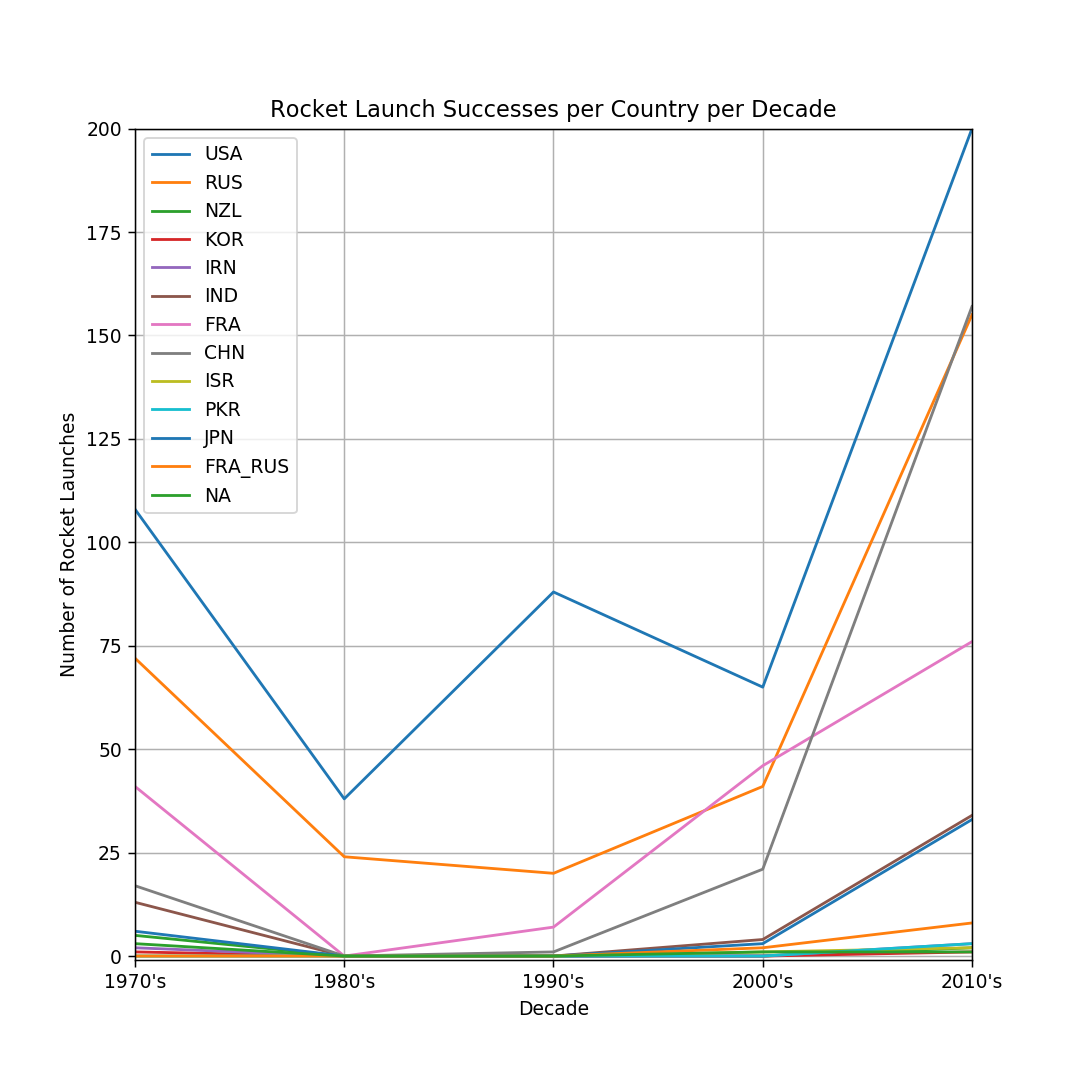

In [147]:
t = pd.DataFrame(rdf_p.groupby(["lsp_country","Decade"]).count())
t.to_csv('out.csv')
%matplotlib notebook
plt.figure(figsize=(8,8))
JPN_P = [6,0,0,3,33]
PRK_P = [0,0,0,0,3]
NA_P = [3,0,0,1,1]
FRA_RUS_P = [0,0,0,2,8]
USA_P = [108,38,88,65,200]
RUS_P = [72,24,20,41,155]
NZL_P = [5,0,0,0,2]
KOR_P = [1,0,0,0,1]
IRN_P = [2,0,0,0,3]
IND_P = [13,0,0,4,34]
FRA_P = [41,0,7,46,76]
CHN_P = [17,0,1,21,157]
ISR_P = [0,0,0,1,2]
USA_P, = plt.plot(group_names,USA_P,label = "USA")
RUS_P, = plt.plot(group_names,RUS_P,label = "RUS")
NZL_P, = plt.plot(group_names,NZL_P,label = "NZL")
KOR_P, = plt.plot(group_names,KOR_P,label = "KOR")
IRN_P, = plt.plot(group_names,IRN_P,label = "IRN")
IND_P, = plt.plot(group_names,IND_P,label = "IND")
FRA_P, = plt.plot(group_names,FRA_P,label = "FRA")
CHN_P, = plt.plot(group_names,CHN_P,label = "CHN")
ISR_P, = plt.plot(group_names,ISR_P,label = "ISR")
PKR_P, = plt.plot(group_names,PRK_P,label = "PKR")
JPN_P, = plt.plot(group_names,JPN_P,label = "JPN")
FRA_RUS_P, = plt.plot(group_names,FRA_RUS_P,label = "FRA_RUS")
NA_P, = plt.plot(group_names,NA_P,label = "NA") 
plt.legend()
plt.grid()
plt.title("Rocket Launch Successes per Country per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Rocket Launches")
plt.ylim(-1,200)
plt.xlim(group_names[0],group_names[4])
plt.savefig('../Rocket Launch Successes per Country per Decade.png')

In [1]:
u = pd.DataFrame(rdf.groupby(["lsp_country","Decade"]).count())
u.to_csv('saf.csv')
%matplotlib notebook
plt.figure(figsize=(8,8))
JPN_T = [6,0,0,3,33]
PRK_T = [0,0,0,0,3]
NA_T = [3,0,0,1,1]
FRA_RUS_T = [0,0,0,2,8]
USA_T = [109,39,93,107,206]
RUS_T = [73,25,20,42,164]
NZL_T = [5,0,0,0,3]
KOR_T = [1,0,0,1,1]
IRN_T = [2,0,0,0,4]
IND_T = [13,0,0,9,35]
FRA_T = [41,0,8,46,78]
CHN_T = [17,0,1,22,161]
ISR_T = [0,0,0,1,2]
USA_T, = plt.plot(group_names,USA_T,label = "USA")
RUS_T, = plt.plot(group_names,RUS_T,label = "RUS")
NZL_T, = plt.plot(group_names,NZL_T,label = "NZL")
KOR_T, = plt.plot(group_names,KOR_T,label = "KOR")
IRN_T, = plt.plot(group_names,IRN_T,label = "IRN")
IND_T, = plt.plot(group_names,IND_T,label = "IND")
FRA_T, = plt.plot(group_names,FRA_T,label = "FRA")
CHN_T, = plt.plot(group_names,CHN_T,label = "CHN")
ISR_T, = plt.plot(group_names,ISR_T,label = "ISR")
PKR_T, = plt.plot(group_names,PRK_T,label = "PKR")
JPN_T, = plt.plot(group_names,JPN_T,label = "JPN")
FRA_RUS_T, = plt.plot(group_names,FRA_RUS_T,label = "FRA_RUS")
NA_T, = plt.plot(group_names,NA_T,label = "NA") 
plt.legend()
plt.grid()
plt.title("Total Rocket Launches per Country per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Rocket Launches")
plt.ylim(-1,210)
plt.xlim(group_names[0],group_names[4])
plt.savefig('../Total Rocket Launches per Country per Decade.png')

NameError: name 'pd' is not defined

<IPython.core.display.Javascript object>


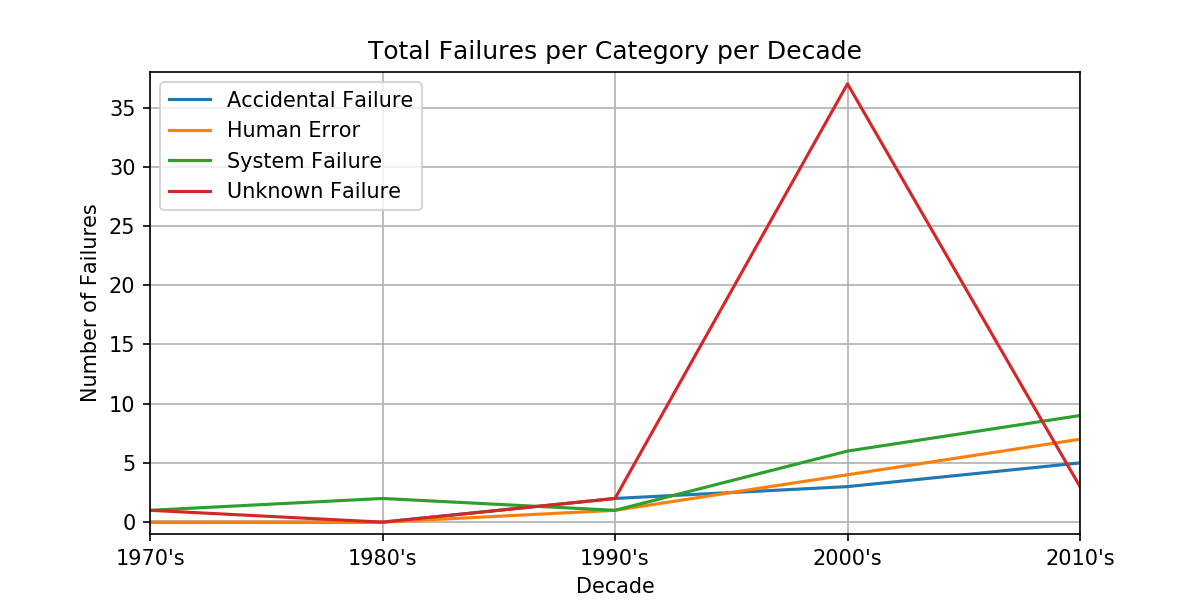

In [193]:
cat = pd.read_csv("safwan.csv")
category = pd.DataFrame(cat.groupby(['Failure_Category','Decade']).count())
category.head(100)
%matplotlib notebook
plt.figure(figsize=(8,4))
Accidental_Failure = [0,0,2,3,5]
Human_Error = [0,0,1,4,7] 
System_Failure = [1,2,1,6,9]
Unknown_Failure = [1,0,2,37,3]
Accidental_Failure, = plt.plot(group_names,Accidental_Failure,label = "Accidental Failure")
Human_Error, = plt.plot(group_names,Human_Error,label = "Human Error")
System_Failure, = plt.plot(group_names,System_Failure,label = "System Failure")
Unknown_Failure, = plt.plot(group_names,Unknown_Failure,label = "Unknown Failure")
plt.legend()
plt.grid()
plt.title("Total Failures per Category per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Failures")
plt.ylim(-1,38)
plt.xlim(group_names[0],group_names[4])
plt.savefig('../Total Failures per Category per Decade.png')

<IPython.core.display.Javascript object>


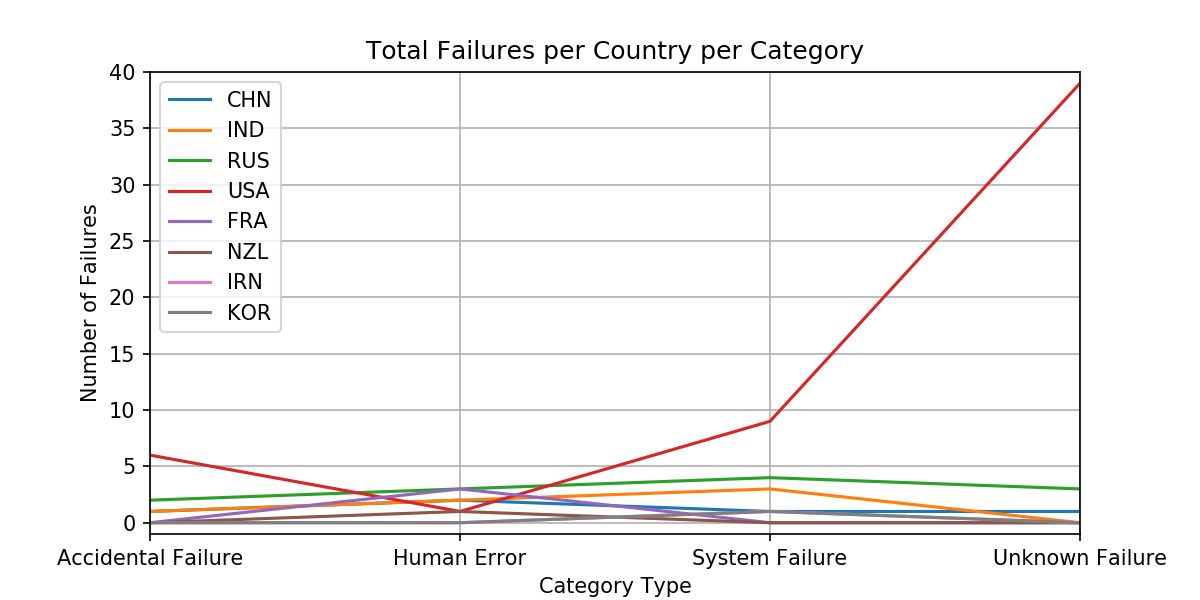

In [212]:
country_category = pd.DataFrame(cat.groupby(['Failure_Category','lsp_country']).count())
country_category.head(400)
cat_type = ["Accidental Failure","Human Error","System Failure","Unknown Failure"]
%matplotlib notebook
plt.figure(figsize=(8,4))
CHN = [1,2,1,1]
IND = [1,2,3,0] 
RUS = [2,3,4,3]
USA = [6,1,9,39]
FRA = [0,3,0,0]
NZL = [0,1,0,0]
IRN = [0,0,1,0]
KOR = [0,0,1,0]
CHN, = plt.plot(cat_type,CHN,label = "CHN")
IND, = plt.plot(cat_type,IND,label = "IND")
RUS, = plt.plot(cat_type,RUS,label = "RUS")
USA, = plt.plot(cat_type,USA,label = "USA")
FRA, = plt.plot(cat_type,FRA,label = "FRA")
NZL, = plt.plot(cat_type,NZL,label = "NZL")
IRN, = plt.plot(cat_type,IRN,label = "IRN")
KOR, = plt.plot(cat_type,KOR,label = "KOR")
plt.legend()
plt.grid()
plt.title("Total Failures per Country per Category")
plt.xlabel("Category Type")
plt.ylabel("Number of Failures")
plt.ylim(-1,40)
plt.xlim(cat_type[0],cat_type[3])
plt.savefig('../Total Failures per Country per Category.png')